In [1]:
import glob
from Bio.SeqIO import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jellyfish import hamming_distance

Prototyping error correction methods
===

Load sequence data
---

Directory containing `fastq` files:

In [2]:
data_dir = '/Users/williamdewitt/Downloads'

List of `collapse-unique.fastq` files (one per sample)

In [3]:
files = glob.glob(f'{data_dir}/unique_*_collapse-unique.fastq')
files

['/Users/williamdewitt/Downloads/unique_P1_collapse-unique.fastq']

Using just one sample, parse into a `pandas.DataFrame` with sequence and abundance columns

In [4]:
df = pd.DataFrame(sorted([(int(seq.id.split('|')[3].split('=')[1]), str(seq.seq))
                          for seq in parse(files[0], 'fastq')], reverse=True),
                  columns=('abundance', 'sequence'))
df

,abundance,sequence
0,10804,NNNNNNNNNNNNNNNNNNNNNNNNACTGTCTCTGGTGCCTACATCA...
1,8855,NNNNNNNNNNNNNNNNNNNNNNNNTCTCTAGCAACGATGCTACTTG...
2,8164,NNNNNNNNNNNNNNNNNNNNNNNNGACCCTCACGCTGACCTGCAAT...
3,7887,NNNNNNNNNNNNNNNNNNNNNNNNACTGTCTCTGGTGGCTCCATCA...
4,7232,NNNNNNNNNNNNNNNNNNNNNNNNACTGTCTCTGGTGCCTCCATCA...
...,...,...
296894,1,NNNNNNNNNNNNNNNNNNNNNAAAGCCCGGGGAGTCTCTGAAGATC...
296895,1,NNNNNNNNNNNNNNNNNNNNNAAAGCCCGGGGAGTCTCTGAAGATC...
296896,1,NNNNNNNNNNNNNNNNNNNNNAAACCCGGGGAGTCTCTGAAGATCT...
296897,1,NNNNNNNNNNNNNNNNNNNNNAAACCCGGGGAGTCTCTGAAGATCT...


Abundance distribution
---

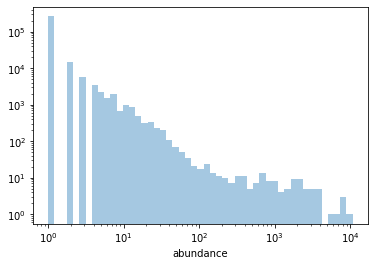

In [5]:
sns.distplot(df.abundance, kde=False,
             bins=np.logspace(0, np.log10(df.abundance.max()), 50))
plt.xscale('log')
plt.yscale('log')
plt.show()

Correct singletons
---

In [ ]:
abundance_threshold = 100
distance_threshold = 1

singletons = (df.abundance == 1)
putative_parent_idxs = df.index[df.abundance >= abundance_threshold]

n_singletons = len(singletons)
n_singletons_remaining = n_singletons

for ct, i in enumerate(putative_parent_idxs, 1):
    if df.abundance[i] < abundance_threshold:
        break
    for j in df.index[singletons]:
        if len(df.sequence[i]) != len(df.sequence[j]):
            continue
        if hamming_distance(df.sequence[i], df.sequence[j]) <= distance_threshold:
            df.loc[i, 'abundance'] += df.abundance[j]
            df.loc[j, 'abundance'] = 0
            singletons[j] = False
            n_singletons_remaining -= 1
        print(f'putative parent sequence {ct} of {len(putative_parent_idxs)}, {n_singletons_remaining / n_singletons:.2%} of singletons remaining', end='    \r')

putative parent sequence 91 of 188, 93.69% of singletons remaining                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

TODO: Abundance distribution after singleton correction
---